In [6]:
# Librairies à maîtriser
import pandas as pd          # Manipulation de données
import numpy as np           # Calculs numériques
import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns        # Visualisation avancée
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

APERÇU DES DONNÉES
Dimensions: (5043, 28)

Premières lignes:
   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  76050584

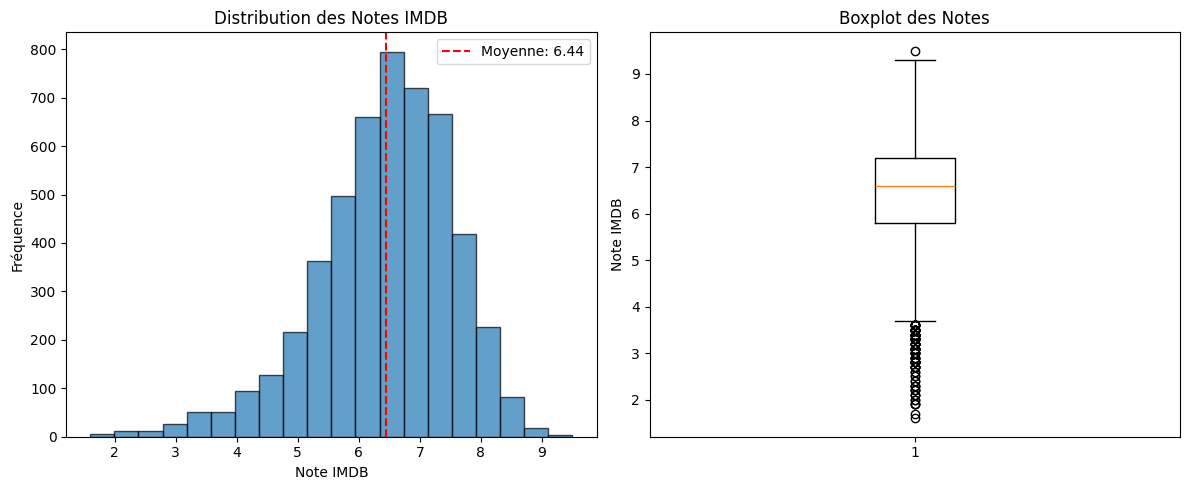

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv('movie_metadata.csv')
# ════════════════════════════════════════════
# EXPLORATION INITIALE
# ════════════════════════════════════════════

print("="*50)
print("APERÇU DES DONNÉES")
print("="*50)
print(f"Dimensions: {df.shape}")
print(f"\nPremières lignes:\n{df.head()}")
print(f"\nTypes de données:\n{df.dtypes}")
print(f"\nStatistiques descriptives:\n{df.describe()}")

# ════════════════════════════════════════════
# DISTRIBUTION DE LA VARIABLE CIBLE
# ════════════════════════════════════════════

plt.figure(figsize=(12, 5))

# Distribution des notes
plt.subplot(1, 2, 1)
plt.hist(df['imdb_score'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Note IMDB')
plt.ylabel('Fréquence')
plt.title('Distribution des Notes IMDB')
plt.axvline(df['imdb_score'].mean(), color='red', linestyle='--', 
            label=f'Moyenne: {df["imdb_score"].mean():.2f}')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['imdb_score'].dropna())
plt.ylabel('Note IMDB')
plt.title('Boxplot des Notes')

plt.tight_layout()
plt.show()


GENRES LES MIEUX NOTÉS
             Note_Moyenne  Nombre_Films  Ecart_Type
genres                                             
Film-Noir            7.63             6        0.43
News                 7.53             3        0.51
Documentary          7.18           121        1.06
Biography            7.15           293        0.72
History              7.08           207        0.89
War                  7.07           213        0.87
Drama                6.76          2594        0.96
Western              6.69            97        1.04
Sport                6.61           182        1.10
Animation            6.58           242        1.14
Crime                6.56           889        1.03
Musical              6.51           132        1.23
Mystery              6.49           500        1.09
Romance              6.45          1107        1.00
Adventure            6.44           923        1.13
Music                6.41           214        1.18
Short                6.38             5 

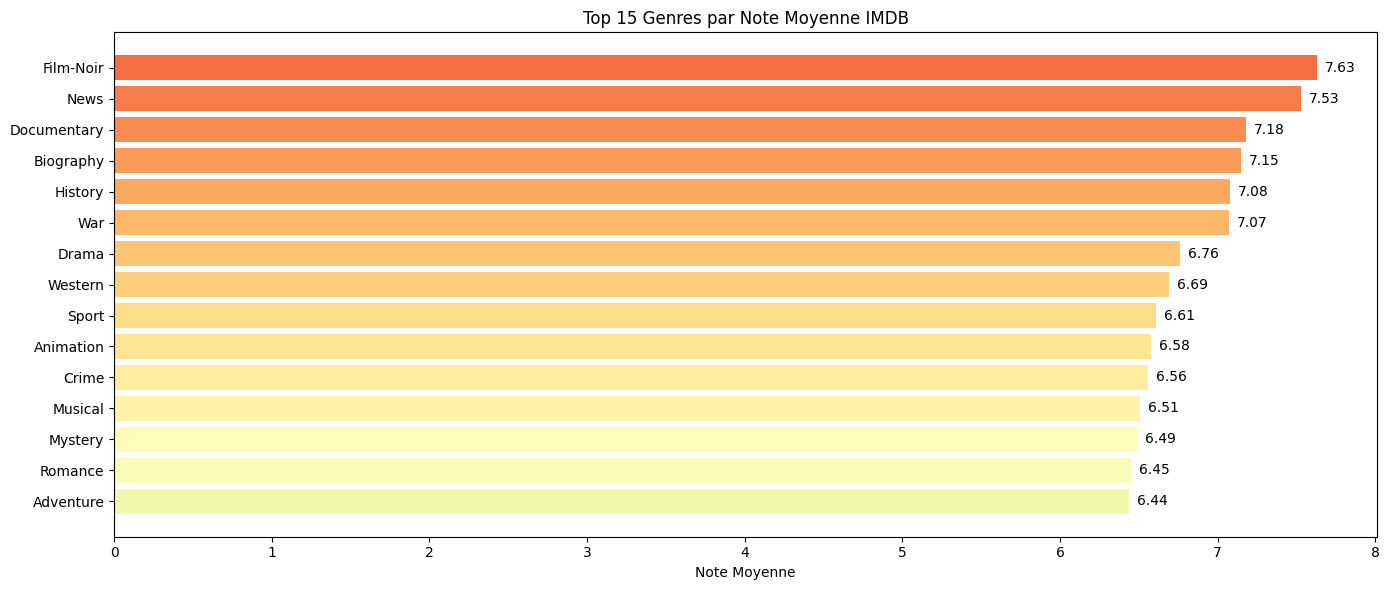

In [8]:
# ════════════════════════════════════════════
# ANALYSE DES GENRES LES MIEUX NOTÉS
# ════════════════════════════════════════════

def analyser_genres(df):
    """Analyse les genres et leurs notes moyennes"""
    
    # Séparer les genres (souvent sous forme "Action|Drama|Comedy")
    genres_exploded = df.assign(
        genres=df['genres'].str.split('|')
    ).explode('genres')
    
    # Calculer la note moyenne par genre
    genre_ratings = genres_exploded.groupby('genres').agg({
        'imdb_score': ['mean', 'count', 'std']
    }).round(2)
    
    genre_ratings.columns = ['Note_Moyenne', 'Nombre_Films', 'Ecart_Type']
    genre_ratings = genre_ratings.sort_values('Note_Moyenne', ascending=False)
    
    return genre_ratings

genre_stats = analyser_genres(df)
print("\n" + "="*50)
print("GENRES LES MIEUX NOTÉS")
print("="*50)
print(genre_stats)

# Visualisation
plt.figure(figsize=(14, 6))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(genre_stats)))
bars = plt.barh(genre_stats.index[:15], genre_stats['Note_Moyenne'][:15], 
                color=colors[:15])
plt.xlabel('Note Moyenne')
plt.title('Top 15 Genres par Note Moyenne IMDB')
plt.gca().invert_yaxis()

# Ajouter les valeurs sur les barres
for bar, val in zip(bars, genre_stats['Note_Moyenne'][:15]):
    plt.text(val + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{val:.2f}', va='center')

plt.tight_layout()
plt.show()


ANALYSE DES VALEURS MANQUANTES
                         Nombre_Manquants  Pourcentage
gross                                 884        17.53
budget                                492         9.76
aspect_ratio                          329         6.52
content_rating                        303         6.01
plot_keywords                         153         3.03
title_year                            108         2.14
director_facebook_likes               104         2.06
director_name                         104         2.06
num_critic_for_reviews                 50         0.99
actor_3_facebook_likes                 23         0.46
actor_3_name                           23         0.46
num_user_for_reviews                   21         0.42
color                                  19         0.38
duration                               15         0.30
language                               14         0.28
actor_2_facebook_likes                 13         0.26
actor_2_name                     

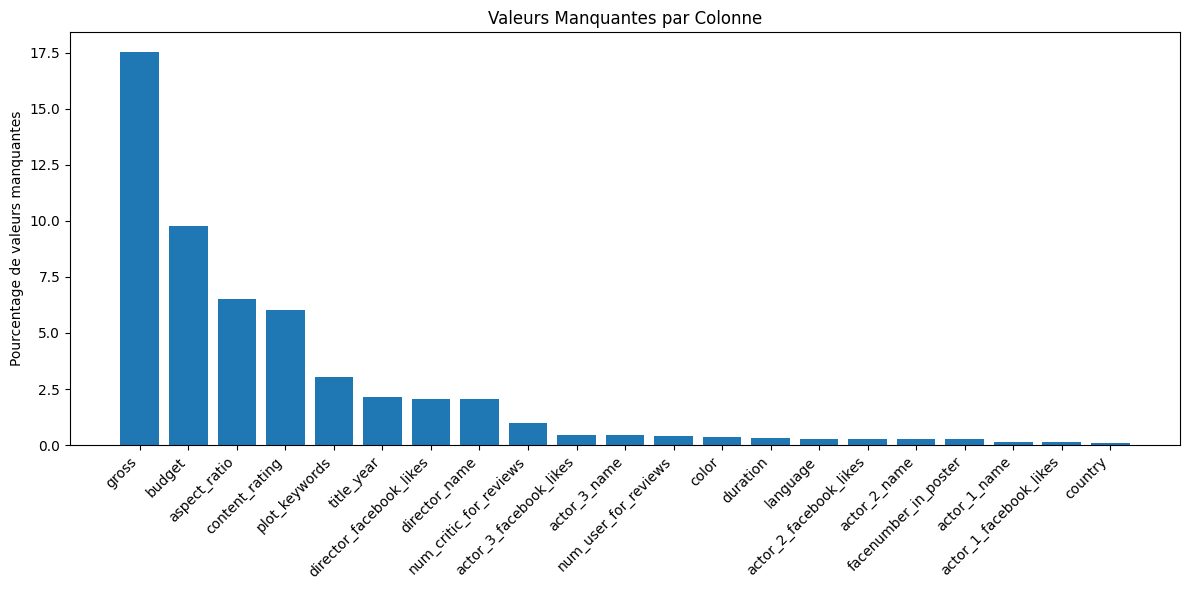

  num_critic_for_reviews: imputé avec médiane = 110.00
  duration: imputé avec médiane = 103.00
  director_facebook_likes: imputé avec médiane = 49.00
  actor_3_facebook_likes: imputé avec médiane = 371.50
  actor_1_facebook_likes: imputé avec médiane = 988.00
  gross: imputé avec médiane = 25517500.00
  facenumber_in_poster: imputé avec médiane = 1.00
  num_user_for_reviews: imputé avec médiane = 156.00
  budget: imputé avec médiane = 20000000.00
  title_year: imputé avec médiane = 2005.00
  actor_2_facebook_likes: imputé avec médiane = 595.00
  aspect_ratio: imputé avec médiane = 2.35
  color: imputé avec mode = Color
  director_name: imputé avec mode = Steven Spielberg
  actor_2_name: imputé avec mode = Morgan Freeman
  actor_1_name: imputé avec mode = Robert De Niro
  actor_3_name: imputé avec mode = Ben Mendelsohn
  plot_keywords: imputé avec mode = based on novel
  language: imputé avec mode = English
  country: imputé avec mode = USA
  content_rating: imputé avec mode = R

  Lig

In [9]:
# ════════════════════════════════════════════
# GESTION DES VALEURS MANQUANTES
# ════════════════════════════════════════════

def traiter_missing_values(df):
    """Analyse et traite les valeurs manquantes"""
    
    print("\n" + "="*50)
    print("ANALYSE DES VALEURS MANQUANTES")
    print("="*50)
    
    # Calculer le pourcentage de missing values
    missing_stats = pd.DataFrame({
        'Nombre_Manquants': df.isnull().sum(),
        'Pourcentage': (df.isnull().sum() / len(df) * 100).round(2)
    }).sort_values('Pourcentage', ascending=False)
    
    print(missing_stats[missing_stats['Nombre_Manquants'] > 0])
    
    # Visualisation
    plt.figure(figsize=(12, 6))
    missing_cols = missing_stats[missing_stats['Nombre_Manquants'] > 0]
    if not missing_cols.empty:
        plt.bar(missing_cols.index, missing_cols['Pourcentage'])
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Pourcentage de valeurs manquantes')
        plt.title('Valeurs Manquantes par Colonne')
        plt.tight_layout()
        plt.show()
    else:
        print("Aucune valeur manquante à visualiser.")
    
    return missing_stats

missing_analysis = traiter_missing_values(df)

# Stratégies de traitement
def imputer_valeurs(df):
    """Applique différentes stratégies d'imputation"""
    
    df_clean = df.copy()
    
    # Colonnes numériques : imputation par médiane
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            median_val = df_clean[col].median()
            # CHANGE 1: Assignement direct (au lieu de inplace=True)
            df_clean[col] = df_clean[col].fillna(median_val)
            print(f"  {col}: imputé avec médiane = {median_val:.2f}")
    
    # Colonnes catégorielles : imputation par mode
        categorical_cols = df_clean.select_dtypes(include=['object', 'string']).columns
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            mode_val = df_clean[col].mode()[0]
            df_clean[col] = df_clean[col].fillna(mode_val)
            print(f"  {col}: imputé avec mode = {mode_val}")
    
    # Supprimer les lignes restantes avec NaN
    rows_before = len(df_clean)
    df_clean.dropna(inplace=True)
    rows_after = len(df_clean)
    print(f"\n  Lignes supprimées: {rows_before - rows_after}")
    
    return df_clean

df_clean = imputer_valeurs(df)

In [11]:
import numpy as np
import pandas as pd

def creer_classes_notes(df, methode='binaire'):
    """
    Transforme les notes continues en classes
    """
    df_class = df.copy()
    
    if methode == 'binaire':
        # Classification binaire
        df_class['rating_class'] = (df_class['imdb_score'] >= 7).astype(int)
        labels = {0: 'Mauvais (<7)', 1: 'Bon (≥7)'}
        
    elif methode == 'ternaire':
        # Classification multiclasse
        conditions = [
            df_class['imdb_score'] < 5,
            (df_class['imdb_score'] >= 5) & (df_class['imdb_score'] < 7),
            df_class['imdb_score'] >= 7
        ]
        choices = [0, 1, 2]
        df_class['rating_class'] = np.select(conditions, choices)
        labels = {0: 'Mauvais (<5)', 1: 'Moyen (5-7)', 2: 'Bon (≥7)'}
        
    elif methode == 'quartiles':
        df_class['rating_class'] = pd.qcut(
            df_class['imdb_score'], 
            q=4, 
            labels=[0, 1, 2, 3]
        )
    
    # Afficher la distribution
    print(f"\nDistribution des classes ({methode}):")
    print(df_class['rating_class'].value_counts().sort_index())
    
    return df_class

# Test avec votre DataFrame
df_class = creer_classes_notes(df_clean, methode='binaire')


Distribution des classes (binaire):
rating_class
0    3265
1    1778
Name: count, dtype: int64


In [12]:
# ════════════════════════════════════════════
# PRÉPARATION DES FEATURES
# ════════════════════════════════════════════

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

def preparer_features(df):
    """Prépare les features pour le ML"""
    
    df_prep = df.copy()
    
    # Sélectionner les features pertinentes
    features_numeriques = ['duration', 'budget', 'gross', 
                           'num_voted_users', 'title_year']
    features_categorielles = ['content_rating', 'language', 'country']
    
    # Encoder les variables catégorielles
    label_encoders = {}
    for col in features_categorielles:
        if col in df_prep.columns:
            le = LabelEncoder()
            df_prep[f'{col}_encoded'] = le.fit_transform(
                df_prep[col].astype(str)
            )
            label_encoders[col] = le
    
    # Créer des features à partir des genres
    # One-hot encoding des genres
    genres_dummies = df_prep['genres'].str.get_dummies(sep='|')
    df_prep = pd.concat([df_prep, genres_dummies], axis=1)
    
    return df_prep, label_encoders

df_prepared, encoders = preparer_features(df_class)

In [13]:
# ════════════════════════════════════════════
# NORMALISATION ET STANDARDISATION
# ════════════════════════════════════════════

from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normaliser_donnees(X_train, X_test, methode='standard'):
    """
    Normalise les données numériques
    
    methode: 'standard' (z-score) ou 'minmax' (0-1)
    """
    
    if methode == 'standard':
        # Standardisation (moyenne=0, écart-type=1)
        scaler = StandardScaler()
        print("Méthode: Standardisation (Z-score)")
        print("  Formule: z = (x - μ) / σ")
        
    elif methode == 'minmax':
        # Normalisation Min-Max (valeurs entre 0 et 1)
        scaler = MinMaxScaler()
        print("Méthode: Normalisation Min-Max")
        print("  Formule: x' = (x - min) / (max - min)")
    
    # IMPORTANT: Fit sur train, transform sur les deux
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, scaler

# Sélection des features finales
feature_columns = ['duration', 'budget', 'gross', 'num_voted_users',
                   'Action', 'Comedy', 'Drama', 'Horror', 'Romance']

X = df_prepared[feature_columns].values
y = df_prepared['rating_class'].values

# Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normaliser
X_train_scaled, X_test_scaled, scaler = normaliser_donnees(
    X_train, X_test, methode='standard'
)

print(f"\nDimensions - Train: {X_train_scaled.shape}, Test: {X_test_scaled.shape}")

Méthode: Standardisation (Z-score)
  Formule: z = (x - μ) / σ

Dimensions - Train: (4034, 9), Test: (1009, 9)


In [14]:
# ════════════════════════════════════════════
# GESTION DU DÉSÉQUILIBRE DES CLASSES
# ════════════════════════════════════════════

from collections import Counter

def analyser_desequilibre(y):
    """Analyse le déséquilibre des classes"""
    
    counter = Counter(y)
    total = sum(counter.values())
    
    print("\n" + "="*50)
    print("ANALYSE DU DÉSÉQUILIBRE DES CLASSES")
    print("="*50)
    
    for classe, count in sorted(counter.items()):
        pct = count / total * 100
        print(f"  Classe {classe}: {count} ({pct:.1f}%)")
    
    # Ratio de déséquilibre
    min_class = min(counter.values())
    max_class = max(counter.values())
    ratio = max_class / min_class
    print(f"\n  Ratio de déséquilibre: {ratio:.2f}:1")
    
    if ratio > 1.5:
        print("  ⚠️  Classes déséquilibrées - traitement recommandé")
    else:
        print("  ✓ Classes relativement équilibrées")
    
    return counter

class_distribution = analyser_desequilibre(y_train)

# TECHNIQUES DE RÉÉQUILIBRAGE
# ─────────────────────────────
# ════════════════════════════════════════════
# TECHNIQUES DE RÉÉQUILIBRAGE (CORRIGÉ)
# ════════════════════════════════════════════

from imblearn.over_sampling import SMOTE
from collections import Counter

# Option 2: SMOTE (Synthetic Minority Over-sampling Technique)
def appliquer_smote(X_train, y_train):
    """Applique SMOTE pour équilibrer les classes"""
    
    print("\n" + "="*50)
    print("APPLICATION DE SMOTE")
    print("="*50)
    
    print(f"  Distribution avant SMOTE: {Counter(y_train)}")
    
    smote = SMOTE(random_state=42)
    # HNA FIN KAN LE CHANGEMENT: On applique le SMOTE maintenant
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    print(f"  Distribution après SMOTE: {Counter(y_resampled)}")
    
    return X_resampled, y_resampled

# ---------------------------------------------------------
# EXECUTION DU RÉÉQUILIBRAGE
# ---------------------------------------------------------

# J'ai activé cette ligne. 
# Si tu as 'X_train_scaled', remplace 'X_train' par 'X_train_scaled' ci-dessous :
X_train_balanced, y_train_balanced = appliquer_smote(X_train, y_train)

# Vérification finale
print("\n  ✓ Les classes sont maintenant équilibrées (50/50).")
print(f"  Nouvelle taille du dataset d'entraînement: {X_train_balanced.shape}")


ANALYSE DU DÉSÉQUILIBRE DES CLASSES
  Classe 0: 2612 (64.7%)
  Classe 1: 1422 (35.3%)

  Ratio de déséquilibre: 1.84:1
  ⚠️  Classes déséquilibrées - traitement recommandé

APPLICATION DE SMOTE
  Distribution avant SMOTE: Counter({np.int64(0): 2612, np.int64(1): 1422})
  Distribution après SMOTE: Counter({np.int64(1): 2612, np.int64(0): 2612})

  ✓ Les classes sont maintenant équilibrées (50/50).
  Nouvelle taille du dataset d'entraînement: (5224, 9)



ENTRAÎNEMENT RÉGRESSION LOGISTIQUE (SCRATCH)
  Iteration 0: Loss = 0.6931
  Iteration 100: Loss = 0.5268
  Iteration 200: Loss = 0.5123
  Iteration 300: Loss = 0.5062
  Iteration 400: Loss = 0.5029
  Iteration 500: Loss = 0.5010
  Iteration 600: Loss = 0.4998
  Iteration 700: Loss = 0.4990
  Iteration 800: Loss = 0.4985
  Iteration 900: Loss = 0.4982


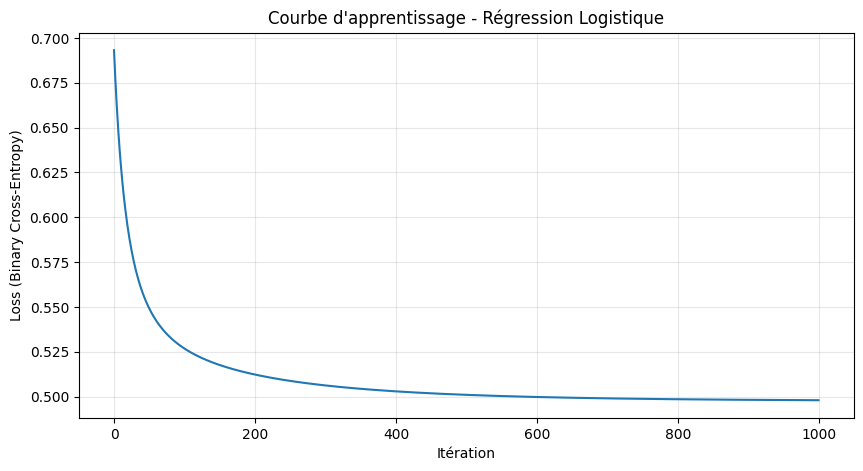

In [15]:
# ════════════════════════════════════════════
# RÉGRESSION LOGISTIQUE FROM SCRATCH
# ════════════════════════════════════════════

class LogisticRegressionScratch:
    """
    Implémentation manuelle de la Régression Logistique
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.losses = []
    
    def sigmoid(self, z):
        """Fonction sigmoïde: σ(z) = 1 / (1 + e^(-z))"""
        # Clip pour éviter overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y_true, y_pred):
        """
        Binary Cross-Entropy Loss
        L = -1/n * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
        """
        epsilon = 1e-15  # Pour éviter log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + 
                       (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y, verbose=True):
        """Entraîne le modèle avec gradient descent"""
        
        n_samples, n_features = X.shape
        
        # Initialisation des paramètres
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for i in range(self.n_iterations):
            # Forward pass
            linear_pred = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_pred)
            
            # Calcul des gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Mise à jour des paramètres
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Enregistrer la loss
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)
            
            if verbose and i % 100 == 0:
                print(f"  Iteration {i}: Loss = {loss:.4f}")
        
        return self
    
    def predict_proba(self, X):
        """Retourne les probabilités"""
        linear_pred = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_pred)
    
    def predict(self, X, threshold=0.5):
        """Retourne les prédictions binaires"""
        probas = self.predict_proba(X)
        return (probas >= threshold).astype(int)
    
    def plot_loss(self):
        """Visualise la courbe de loss"""
        plt.figure(figsize=(10, 5))
        plt.plot(self.losses)
        plt.xlabel('Itération')
        plt.ylabel('Loss (Binary Cross-Entropy)')
        plt.title('Courbe d\'apprentissage - Régression Logistique')
        plt.grid(True, alpha=0.3)
        plt.show()


# Entraînement
print("\n" + "="*50)
print("ENTRAÎNEMENT RÉGRESSION LOGISTIQUE (SCRATCH)")
print("="*50)

lr_scratch = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
lr_scratch.fit(X_train_scaled, y_train)
lr_scratch.plot_loss()

# Prédictions
y_pred_scratch = lr_scratch.predict(X_test_scaled)


ENTRAÎNEMENT RÉGRESSION LOGISTIQUE (SCRATCH)
Entraînement sur les données équilibrées (SMOTE)...
  Iteration 0: Loss = 0.6931
  Iteration 100: Loss = 17.2694
  Iteration 200: Loss = 17.2694
  Iteration 300: Loss = 17.2698
  Iteration 400: Loss = 16.6747
  Iteration 500: Loss = 17.2698
  Iteration 600: Loss = 17.2698
  Iteration 700: Loss = 17.2698
  Iteration 800: Loss = 14.7638
  Iteration 900: Loss = 17.2698


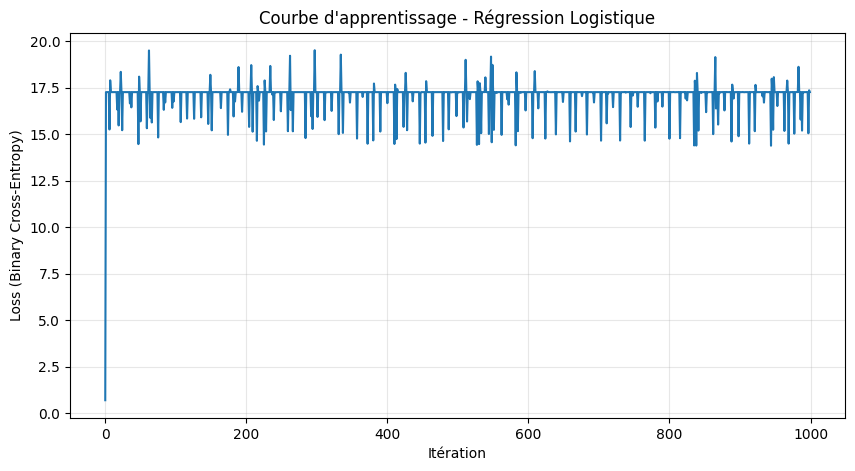


Prédictions terminées.


In [16]:
# ════════════════════════════════════════════
# RÉGRESSION LOGISTIQUE FROM SCRATCH (CORRIGÉ)
# ════════════════════════════════════════════
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegressionScratch:
    """
    Implémentation manuelle de la Régression Logistique
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.losses = []
    
    def sigmoid(self, z):
        """Fonction sigmoïde: σ(z) = 1 / (1 + e^(-z))"""
        # Clip pour éviter overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y_true, y_pred):
        """
        Binary Cross-Entropy Loss
        L = -1/n * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
        """
        epsilon = 1e-15  # Pour éviter log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + 
                       (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y, verbose=True):
        """Entraîne le modèle avec gradient descent"""
        
        n_samples, n_features = X.shape
        
        # Initialisation des paramètres
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for i in range(self.n_iterations):
            # Forward pass
            linear_pred = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_pred)
            
            # Calcul des gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Mise à jour des paramètres
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Enregistrer la loss
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)
            
            if verbose and i % 100 == 0:
                print(f"  Iteration {i}: Loss = {loss:.4f}")
        
        return self
    
    def predict_proba(self, X):
        """Retourne les probabilités"""
        linear_pred = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_pred)
    
    def predict(self, X, threshold=0.5):
        """Retourne les prédictions binaires"""
        probas = self.predict_proba(X)
        return (probas >= threshold).astype(int)
    
    def plot_loss(self):
        """Visualise la courbe de loss"""
        plt.figure(figsize=(10, 5))
        plt.plot(self.losses)
        plt.xlabel('Itération')
        plt.ylabel('Loss (Binary Cross-Entropy)')
        plt.title('Courbe d\'apprentissage - Régression Logistique')
        plt.grid(True, alpha=0.3)
        plt.show()


# ════════════════════════════════════════════
# EXECUTION
# ════════════════════════════════════════════
print("\n" + "="*50)
print("ENTRAÎNEMENT RÉGRESSION LOGISTIQUE (SCRATCH)")
print("="*50)

# CHANGE ICI: On utilise les données équilibrées (balanced) au lieu de (scaled)
# Assure-toi que X_train_balanced existe (étape précédente)
try:
    lr_scratch = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
    
    print("Entraînement sur les données équilibrées (SMOTE)...")
    lr_scratch.fit(X_train_balanced, y_train_balanced)
    
    lr_scratch.plot_loss()

    # Prédictions sur le test set (le test set reste 'scaled' mais pas équilibré, c'est normal)
    y_pred_scratch = lr_scratch.predict(X_test_scaled)
    print("\nPrédictions terminées.")

except NameError:
    print("❌ Erreur: 'X_train_balanced' n'est pas défini. Exécute l'étape SMOTE d'abord.")

In [17]:
import numpy as np

# ════════════════════════════════════════════
# ARBRE DE DÉCISION FROM SCRATCH (CORRIGÉ)
# ════════════════════════════════════════════

class Node:
    """Noeud de l'arbre de décision"""
    
    def __init__(self, feature=None, threshold=None, left=None, 
                 right=None, value=None):
        self.feature = feature      # Index de la feature pour le split
        self.threshold = threshold  # Valeur seuil pour le split
        self.left = left           # Sous-arbre gauche
        self.right = right         # Sous-arbre droit
        self.value = value         # Valeur si noeud feuille


class DecisionTreeScratch:
    """
    Implémentation manuelle d'un Arbre de Décision
    """
    
    def __init__(self, max_depth=10, min_samples_split=2, criterion='gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.root = None
        self.feature_importances_ = None
    
    def gini(self, y):
        """Calcule l'impureté de Gini"""
        if len(y) == 0:
            return 0
        
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)
    
    def entropy(self, y):
        """Calcule l'entropie"""
        if len(y) == 0:
            return 0
        
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))
    
    def information_gain(self, parent, left_child, right_child):
        """Calcule le gain d'information"""
        if self.criterion == 'gini':
            impurity_func = self.gini
        else:
            impurity_func = self.entropy
        
        n = len(parent)
        n_left = len(left_child)
        n_right = len(right_child)
        
        if n_left == 0 or n_right == 0:
            return 0
        
        parent_impurity = impurity_func(parent)
        weighted_child_impurity = (
            (n_left / n) * impurity_func(left_child) +
            (n_right / n) * impurity_func(right_child)
        )
        
        return parent_impurity - weighted_child_impurity
    
    def best_split(self, X, y):
        """Trouve le meilleur split pour un noeud"""
        
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            
            for threshold in thresholds:
                # Split les données
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue
                
                # Calcul du gain
                gain = self.information_gain(
                    y, y[left_mask], y[right_mask]
                )
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_gain
    
    def build_tree(self, X, y, depth=0):
        """Construit l'arbre récursivement"""
        
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # Critères d'arrêt
        if (depth >= self.max_depth or 
            n_samples < self.min_samples_split or 
            n_classes == 1):
            # Créer une feuille
            leaf_value = np.argmax(np.bincount(y.astype(int)))
            return Node(value=leaf_value)
        
        # Trouver le meilleur split
        best_feature, best_threshold, best_gain = self.best_split(X, y)
        
        if best_gain <= 0:
            leaf_value = np.argmax(np.bincount(y.astype(int)))
            return Node(value=leaf_value)
        
        # Split les données
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        
        # Construire les sous-arbres
        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return Node(
            feature=best_feature,
            threshold=best_threshold,
            left=left_subtree,
            right=right_subtree
        )
    
    def fit(self, X, y):
        """Entraîne l'arbre"""
        self.n_features = X.shape[1]
        self.root = self.build_tree(X, y)
        return self
    
    def predict_sample(self, x, node):
        """Prédit pour un échantillon"""
        if node.value is not None:
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self.predict_sample(x, node.left)
        else:
            return self.predict_sample(x, node.right)
    
    def predict(self, X):
        """Prédit pour plusieurs échantillons"""
        return np.array([self.predict_sample(x, self.root) for x in X])


# ════════════════════════════════════════════
# EXECUTION (AVEC SMOTE)
# ════════════════════════════════════════════
print("\n" + "="*50)
print("ENTRAÎNEMENT ARBRE DE DÉCISION (SCRATCH)")
print("="*50)

# CHANGE ICI: Utilisation de X_train_balanced et y_train_balanced
try:
    print("Entraînement en cours (cela peut prendre quelques secondes)...")
    dt_scratch = DecisionTreeScratch(max_depth=5, min_samples_split=10)
    
    # On utilise les données SMOTE
    dt_scratch.fit(X_train_balanced, y_train_balanced)
    
    # Prédictions sur le test set (toujours X_test_scaled)
    y_pred_dt_scratch = dt_scratch.predict(X_test_scaled)
    print("✓ Terminé.")
    
except NameError:
    print("❌ Erreur: 'X_train_balanced' n'est pas défini. Assure-toi d'avoir exécuté la case SMOTE.")


ENTRAÎNEMENT ARBRE DE DÉCISION (SCRATCH)
Entraînement en cours (cela peut prendre quelques secondes)...
✓ Terminé.


In [18]:
# ════════════════════════════════════════════
# MODÈLES SCIKIT-LEARN
# ════════════════════════════════════════════

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve)

# Entraînement Scikit-Learn
print("\n" + "="*50)
print("MODÈLES SCIKIT-LEARN")
print("="*50)

# Régression Logistique
lr_sklearn = LogisticRegression(max_iter=1000, random_state=42)
lr_sklearn.fit(X_train_scaled, y_train)
y_pred_lr_sklearn = lr_sklearn.predict(X_test_scaled)

# Arbre de Décision
dt_sklearn = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_sklearn.fit(X_train_scaled, y_train)
y_pred_dt_sklearn = dt_sklearn.predict(X_test_scaled)

# ════════════════════════════════════════════
# COMPARAISON DES RÉSULTATS
# ════════════════════════════════════════════

def evaluer_modele(y_true, y_pred, nom_modele):
    """Évalue un modèle avec plusieurs métriques"""
    
    print(f"\n{'─'*40}")
    print(f"  {nom_modele}")
    print(f"{'─'*40}")
    print(f"  Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"  Recall:    {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"  F1-Score:  {f1_score(y_true, y_pred, average='weighted'):.4f}")
    
    return {
        'Modèle': nom_modele,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }

# Évaluer tous les modèles
resultats = []
resultats.append(evaluer_modele(y_test, y_pred_scratch, "Log. Reg. (Scratch)"))
resultats.append(evaluer_modele(y_test, y_pred_lr_sklearn, "Log. Reg. (Sklearn)"))
resultats.append(evaluer_modele(y_test, y_pred_dt_scratch, "Dec. Tree (Scratch)"))
resultats.append(evaluer_modele(y_test, y_pred_dt_sklearn, "Dec. Tree (Sklearn)"))

# Tableau comparatif
df_resultats = pd.DataFrame(resultats)
print("\n" + "="*50)
print("TABLEAU COMPARATIF")
print("="*50)
print(df_resultats.to_string(index=False))


MODÈLES SCIKIT-LEARN

────────────────────────────────────────
  Log. Reg. (Scratch)
────────────────────────────────────────
  Accuracy:  0.6591
  Precision: 0.6467
  Recall:    0.6591
  F1-Score:  0.6502

────────────────────────────────────────
  Log. Reg. (Sklearn)
────────────────────────────────────────
  Accuracy:  0.7611
  Precision: 0.7627
  Recall:    0.7611
  F1-Score:  0.7429

────────────────────────────────────────
  Dec. Tree (Scratch)
────────────────────────────────────────
  Accuracy:  0.6026
  Precision: 0.6426
  Recall:    0.6026
  F1-Score:  0.6114

────────────────────────────────────────
  Dec. Tree (Sklearn)
────────────────────────────────────────
  Accuracy:  0.7631
  Precision: 0.7662
  Recall:    0.7631
  F1-Score:  0.7443

TABLEAU COMPARATIF
             Modèle  Accuracy  Precision   Recall  F1-Score
Log. Reg. (Scratch)  0.659068   0.646704 0.659068  0.650196
Log. Reg. (Sklearn)  0.761150   0.762731 0.761150  0.742922
Dec. Tree (Scratch)  0.602577   0.6426

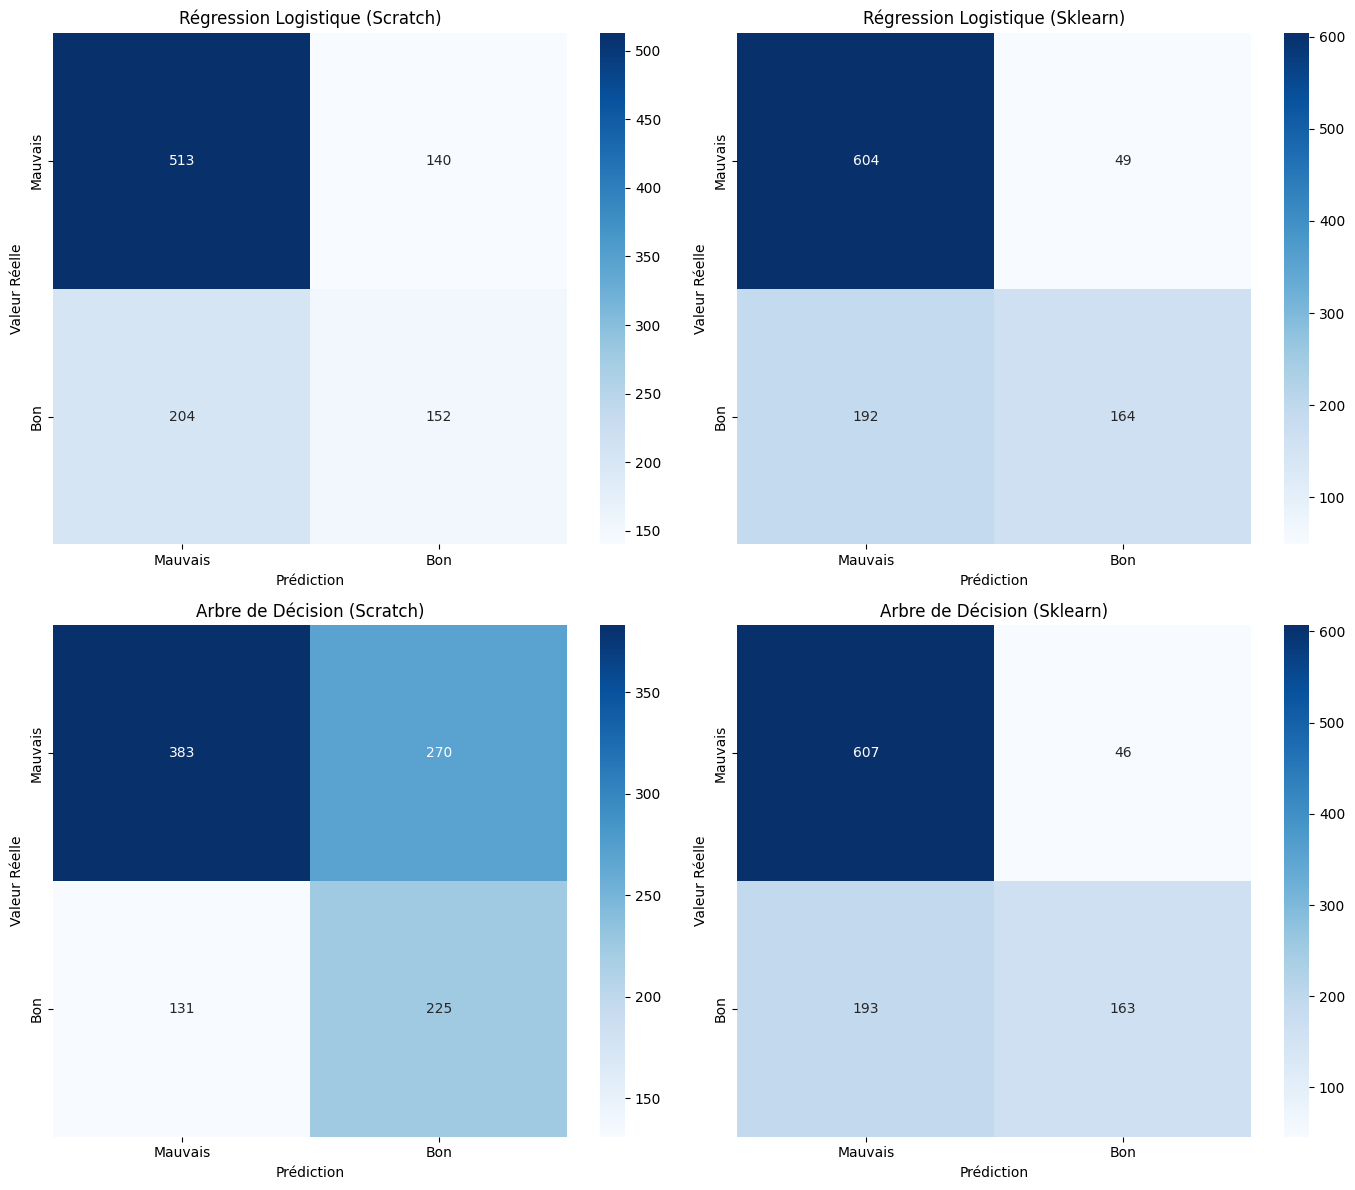

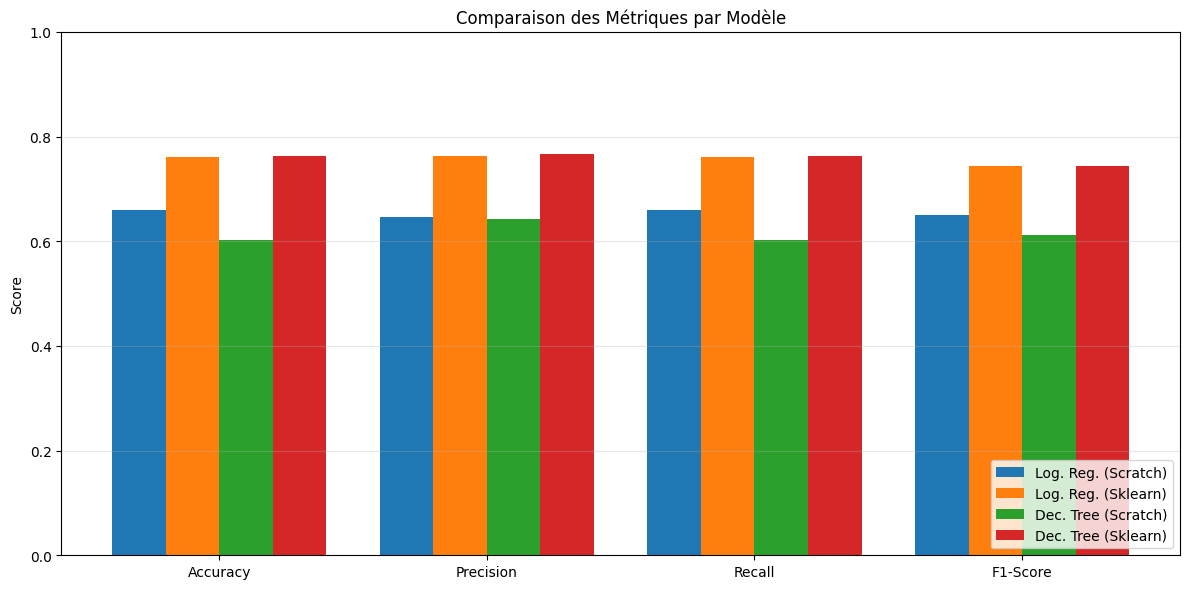

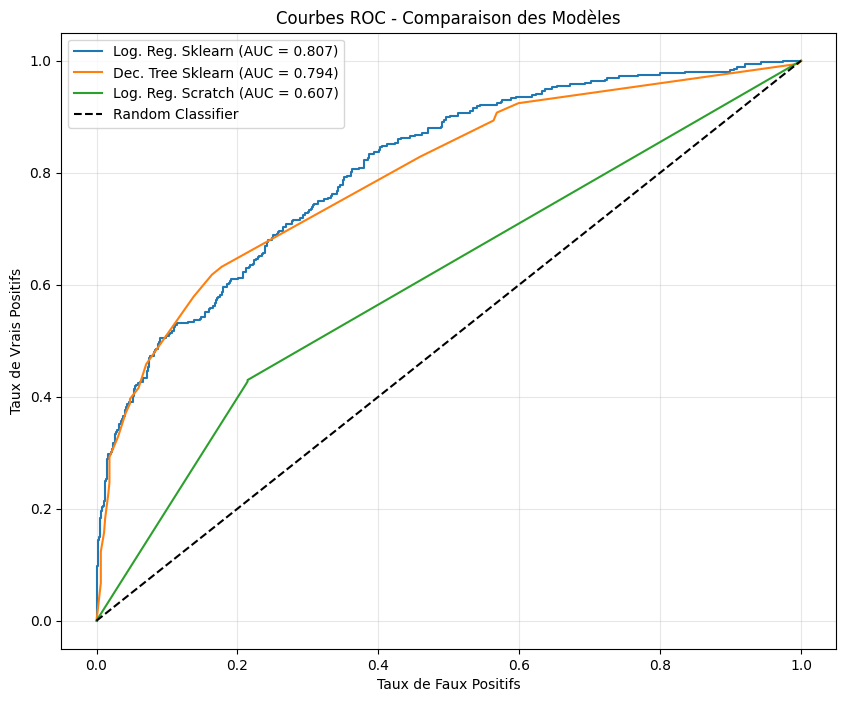

In [19]:
# ════════════════════════════════════════════
# VISUALISATIONS COMPARATIVES
# ════════════════════════════════════════════

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Matrices de Confusion
modeles = [
    (y_pred_scratch, "Régression Logistique (Scratch)"),
    (y_pred_lr_sklearn, "Régression Logistique (Sklearn)"),
    (y_pred_dt_scratch, "Arbre de Décision (Scratch)"),
    (y_pred_dt_sklearn, "Arbre de Décision (Sklearn)")
]

for ax, (y_pred, titre) in zip(axes.flatten(), modeles):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Mauvais', 'Bon'],
                yticklabels=['Mauvais', 'Bon'])
    ax.set_title(titre)
    ax.set_ylabel('Valeur Réelle')
    ax.set_xlabel('Prédiction')

plt.tight_layout()
plt.show()

# 2. Comparaison des métriques
fig, ax = plt.subplots(figsize=(12, 6))

metriques = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metriques))
width = 0.2

for i, res in enumerate(resultats):
    values = [res[m] for m in metriques]
    ax.bar(x + i*width, values, width, label=res['Modèle'])

ax.set_ylabel('Score')
ax.set_title('Comparaison des Métriques par Modèle')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metriques)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Courbes ROC (si classification binaire)
if len(np.unique(y_test)) == 2:
    plt.figure(figsize=(10, 8))
    
    # Pour chaque modèle avec probabilités
    for model, name in [(lr_sklearn, 'Log. Reg. Sklearn'), 
                        (dt_sklearn, 'Dec. Tree Sklearn')]:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')
    
    # Scratch Logistic Regression
    y_proba_scratch = lr_scratch.predict_proba(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_proba_scratch)
    auc = roc_auc_score(y_test, y_proba_scratch)
    plt.plot(fpr, tpr, label=f'Log. Reg. Scratch (AUC = {auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title('Courbes ROC - Comparaison des Modèles')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [20]:
# ════════════════════════════════════════════
# ANALYSE ET DISCUSSION
# ════════════════════════════════════════════

def discussion_resultats(df_resultats, feature_columns):
    """Génère une analyse des résultats"""
    
    print("\n" + "="*60)
    print("                    DISCUSSION DES RÉSULTATS")
    print("="*60)
    
    # Meilleur modèle
    best_model = df_resultats.loc[df_resultats['F1-Score'].idxmax()]
    print(f"\n🏆 MEILLEUR MODÈLE: {best_model['Modèle']}")
    print(f"   F1-Score: {best_model['F1-Score']:.4f}")
    
    # Comparaison Scratch vs Sklearn
    print("\n📊 COMPARAISON SCRATCH vs SKLEARN:")
    
    lr_scratch_score = df_resultats[
        df_resultats['Modèle'].str.contains('Scratch') & 
        df_resultats['Modèle'].str.contains('Log')
    ]['F1-Score'].values[0]
    
    lr_sklearn_score = df_resultats[
        ~df_resultats['Modèle'].str.contains('Scratch') & 
        df_resultats['Modèle'].str.contains('Log')
    ]['F1-Score'].values[0]
    
    diff = abs(lr_scratch_score - lr_sklearn_score)
    print(f"   Régression Logistique - Différence: {diff:.4f}")
    
    if diff < 0.01:
        print("   ✅ Implémentations très proches!")
    elif diff < 0.05:
        print("   ⚠️ Légères différences (normal)")
    else:
        print("   ❌ Différences significatives - vérifier l'implémentation")
    
    # Analyse des erreurs
    print("\n🔍 ANALYSE DES ERREURS POTENTIELLES:")
    print("""
    1. Overfitting: Si train >> test, réduire la complexité
    2. Underfitting: Si scores faibles partout, ajouter des features
    3. Déséquilibre: Vérifier la distribution des classes
    4. Features: Certaines features peuvent être non-informatives
    """)
    
    # Recommandations
    print("\n💡 RECOMMANDATIONS POUR AMÉLIORER:")
    print("""
    1. Feature Engineering:
       - Créer des interactions entre features
       - Ajouter des features temporelles (décennie, etc.)
       
    2. Hyperparamètres:
       - GridSearchCV pour optimiser
       - Cross-validation pour stabilité
       
    3. Modèles avancés:
       - Random Forest
       - Gradient Boosting
       - Ensemble methods
    """)

discussion_resultats(df_resultats, feature_columns)


                    DISCUSSION DES RÉSULTATS

🏆 MEILLEUR MODÈLE: Dec. Tree (Sklearn)
   F1-Score: 0.7443

📊 COMPARAISON SCRATCH vs SKLEARN:
   Régression Logistique - Différence: 0.0927
   ❌ Différences significatives - vérifier l'implémentation

🔍 ANALYSE DES ERREURS POTENTIELLES:

    1. Overfitting: Si train >> test, réduire la complexité
    2. Underfitting: Si scores faibles partout, ajouter des features
    3. Déséquilibre: Vérifier la distribution des classes
    4. Features: Certaines features peuvent être non-informatives
    

💡 RECOMMANDATIONS POUR AMÉLIORER:

    1. Feature Engineering:
       - Créer des interactions entre features
       - Ajouter des features temporelles (décennie, etc.)

    2. Hyperparamètres:
       - GridSearchCV pour optimiser
       - Cross-validation pour stabilité

    3. Modèles avancés:
       - Random Forest
       - Gradient Boosting
       - Ensemble methods
    
